# Entregable 2
## Inteligencia Artificial

En este entregable se realizará la aplicación de Regresión Lineal y Regresión logística. 

## Regresión Lineal:

Trabajaremos con los datos de la clase de EDA [(Clase02)](https://github.com/andrescastro-itm/AI_ITM/blob/main/Clase02/EDA.ipynb). 

1. Deben cargar los datos y realizar una depuración de los mismos (pueden usar lo que se hizo en la clase de EDA)

2. Realizar una división del conjunto de entrenamiento en conjuntos de entrenamiento/prueba, con los porcentajes que consideren

3. Posteriormente, deben entrenar un regresor lineal y reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba

4. Realizar una remoción de algunas características (a discreción de ustedes) y realizar de nuevo el entrenamiento del regresor lineal. Reportar el error cuadrático medio en la predicción del precio de venta _(SalePrice)_ en el conjunto de prueba.

In [20]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Celda para la carga de datos:

In [21]:
df = pd.read_csv("train.csv",index_col=0)

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Solución a punto 1.

Rellenar columnas que poseen datos nulos, realizando imputación de datos con el promedio.

In [22]:
df = df.fillna({'LotFrontage': df['LotFrontage'].mean(), 'MasVnrArea': df['MasVnrArea'].mean(), 'GarageYrBlt': df['GarageYrBlt'].mean()})

Limpieza del dataset realizando 'drop' sobre dos características que poseen casi en su totalidad datos nulos.

In [24]:
def clean_data(df):
    # Drop column: 'Alley'
    df = df.drop(columns=['Alley'])
    # Drop column: 'PoolQC'
    df = df.drop(columns=['PoolQC'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


Separación de conjuntos de características entre númericas y categóricas.

In [25]:
numerical_features_all = df_clean.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

string_columns = df_clean.select_dtypes(include=['object']).columns
print('Columnas categóricas:',string_columns)

Columnas numéricas: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Columnas categóricas: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFin

Aplicación de get_dummies sobre las características categóricas para que devuelvan un valor númerico.

In [26]:
df_str = pd.get_dummies(df_clean, columns=string_columns)
df_str

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


Concatenar características númericas y categóricas(get_dummies) para generar el nuevo dataset completo.

In [27]:
df = pd.concat([df_str, df_num], axis=1)

Verifiación de datos nulos sobre el nuevo dataset

In [28]:
df.isnull().any()

MSSubClass     False
LotFrontage    False
LotArea        False
OverallQual    False
OverallCond    False
               ...  
PoolArea       False
MiscVal        False
MoSold         False
YrSold         False
SalePrice      False
Length: 321, dtype: bool

In [29]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Solución a punto 2.

In [30]:
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Split del dataset en conjuntos de train y test, con un 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Solución a punto 3.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un objeto de regresión lineal
regressor = LinearRegression()

# Ajustar el regresor a los datos de prueba
regressor.fit(X_test, y_test)

# Hacer predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)
print(y_pred)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio es: {mse}')

[[165967.93261719 165967.93261719]
 [356175.93261719 356175.93261719]
 [131663.93261719 131663.93261719]
 [159311.93261719 159311.93261719]
 [308047.93261719 308047.93261719]
 [ 85519.93261719  85519.93261719]
 [308559.93261719 308559.93261719]
 [147919.93261719 147919.93261719]
 [ 81679.93261719  81679.93261719]
 [146767.93261719 146767.93261719]
 [142671.93261719 142671.93261719]
 [131407.93261719 131407.93261719]
 [ 74575.93261719  74575.93261719]
 [224847.93261719 224847.93261719]
 [160591.93261719 160591.93261719]
 [157007.93261719 157007.93261719]
 [192591.93261719 192591.93261719]
 [137551.93261719 137551.93261719]
 [113743.93261719 113743.93261719]
 [238159.93261719 238159.93261719]
 [150351.93261719 150351.93261719]
 [184399.93261719 184399.93261719]
 [150095.93261719 150095.93261719]
 [121167.93261719 121167.93261719]
 [189263.93261719 189263.93261719]
 [152911.93261719 152911.93261719]
 [212047.93261719 212047.93261719]
 [142671.93261719 142671.93261719]
 [174927.93261719 17

## Solución a punto 4

Visualización de la correlación de características respecto a 'SalePrice', la cual es la característica objetivo de predicción, este se realiza con el conjunto de datos númericos.

Por medio del gráfico se extraen algunas características a discreción propia que posean menor relevancia(correlación) con 'SalePrice', estas son seleccionadas en un valor de correlación entre 0 y 0.2.

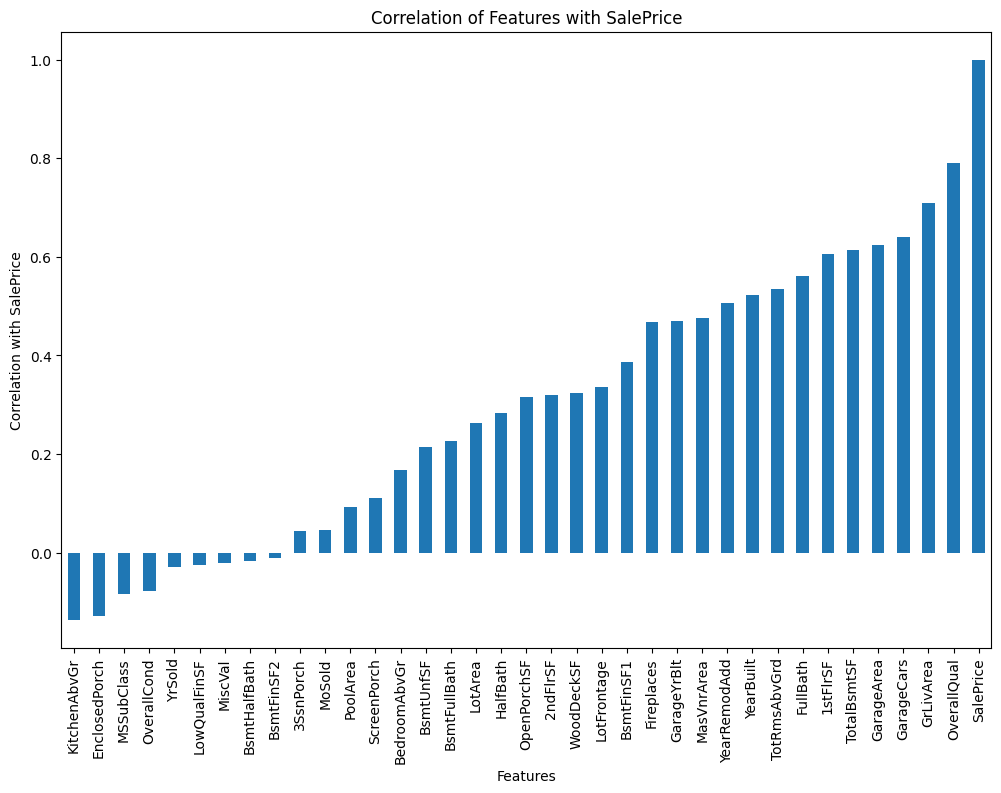

In [32]:
correlation = df_num.corr()['SalePrice'].sort_values()

plt.figure(figsize=(12, 8))
correlation.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Features with SalePrice')
plt.show()


In [14]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df[numerical_features_all].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlación Entre Variables Numéricas')
#plt.show()

Al realizar la remoción de algunas características, el nuevo conjunto de datos es de esperar que cambie el valor del MSE dado por la regresión líneal sobre este conjunto de datos.

In [35]:
# Características a eliminar
features_to_remove = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', 'BsmtUnfSF']

# Remoción de estas características sobre el dataframe
df_reduced = df.drop(features_to_remove, axis=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop('SalePrice', axis=1), df_reduced['SalePrice'], test_size=0.2, random_state=42)

# Crear un objeto de regresión lineal
regressor_reduced = LinearRegression()

# Ajustar el regresor a los datos de entrenamiento
regressor_reduced.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_reduced = regressor_reduced.predict(X_test)

# Calcular el error cuadrático medio
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
print(f'El error cuadrático medio es: {mse_reduced}')

El error cuadrático medio es: 174322176161283.84


## Regresión Logística:

Estos puntos los deben trabajar con **alguno (o si prefieren, todos)** de los conjuntos de datos del proyecto final. 

Lo pueden realizar de dos formas:

- Seleccionar únicamente los datos correspondientes a las clases 1 y 2, es decir, los datos con etiqueta Sabana o Bosque. Verificar que les deben quedar en total 29540 datos entre los conjuntos de entrenamiento, validación y prueba. ó
- Trabajar con las tres clases aprovechando que sklearn utiliza el esquema uno-contra-todos (one-vs-rest OvR)

Realizar las siguientes tareas:

1. Entrenar un modelo de regresión logística con el conjunto de entrenamiento
2. Reportar los resultados logrados con el conjunto de validación en términos de precisión, recall y F1-score. Para este punto pueden usar [classification_report de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
3. Mostrar una matriz de confusión para la clasificación hecha en el conjunto de validación


In [36]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Lectura de Datos

In [37]:
with open('./ais_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_ai = unserialized_data['X']
    y_ai = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [38]:
print(f'Tamaño matriz de características: {X_ai.shape}')
print(f'Tamaño vector de etiquetas: {y_ai.shape}')

Tamaño matriz de características: (71497, 60)
Tamaño vector de etiquetas: (71497, 1)


In [39]:
with open('./vgg_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_vgg = unserialized_data['X']
    y_vgg = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [40]:
print(f'Tamaño matriz de características: {X_vgg.shape}')
print(f'Tamaño vector de etiquetas: {y_vgg.shape}')

Tamaño matriz de características: (71497, 128)
Tamaño vector de etiquetas: (71497, 1)


In [ ]:
with open('./yamn_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_yamn = unserialized_data['X']
    y_yamn = unserialized_data['y']
    print('Datos Cargados!')

In [ ]:
print(f'Tamaño matriz de características: {X_yamn.shape}')
print(f'Tamaño vector de etiquetas: {y_yamn.shape}')

Tamaño matriz de características: (71497, 1024)
Tamaño vector de etiquetas: (71497, 1)


In [ ]:
with open('./panns_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_panns = unserialized_data['X']
    y_panns = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [ ]:
print(f'Tamaño matriz de características: {X_panns.shape}')
print(f'Tamaño vector de etiquetas: {y_panns.shape}')

In [43]:
print(np.unique(y_vgg, return_counts=True)) # Las etiquetas son 0, 1 y 2. Hacen referencia a lo siguiente:
NumtoCover = {0: 'Pastizal', 1:'Sabana', 2:'Bosque'}


(array([0., 1., 2.]), array([41957, 14994, 14546]))


Puede tomar este como datos de entrenamiento y validación directamente

In [44]:
#n_samples = X_ai.shape[0]
#indices = np.arange(n_samples)

#X_ai_train, X_ai_test, y_train, y_test, idx_train, idx_test = train_test_split(X_ai, y_ai, indices, test_size=0.2)
#X_ai_val, X_ai_test, y_val, y_test, idx_val, idx_test = train_test_split(X_ai_test, y_test, idx_test, test_size=0.5)

# Preparación de Datos

In [46]:
nan_indices = np.isnan(X_ai)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 481
Número de valores NaN por columna:
[  0   0   0   0   0   0   0   0   0   0   0   0 478   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0
   0   0   0   0   0   0]


Imputación de Datos


In [48]:
imputer = SimpleImputer(strategy='mean')
X_ai_imputed = imputer.fit_transform(X_ai)

Selección de Clases

In [49]:
selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected = X_ai_imputed[selected_indices]
y_selected = y_ai[selected_indices]

Entrenamiento de Datos (Verificar Cambio)

In [50]:
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Verificación de Total de Datos


In [51]:
total_samples = len(X_train) + len(X_val) + len(X_test)
print("Total de datos seleccionados:", total_samples)

Total de datos seleccionados: 29540


# Solución a Punto 1

Aplicando Regresión Logistica con el Conjunto de Entrenamiento

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Solución a Punto 2

Reporte de Clasificación

In [53]:
y_pred = model.predict(X_val)

#Resultados en términos de precisión, recall y F1-score (SOLO DATOS DE VALIDACIÓN )
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_pred))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         1.0       0.53      0.61      0.57      2251
         2.0       0.53      0.45      0.48      2180

    accuracy                           0.53      4431
   macro avg       0.53      0.53      0.53      4431
weighted avg       0.53      0.53      0.53      4431



# Solución a Punto 3

Mátriz de Confusión

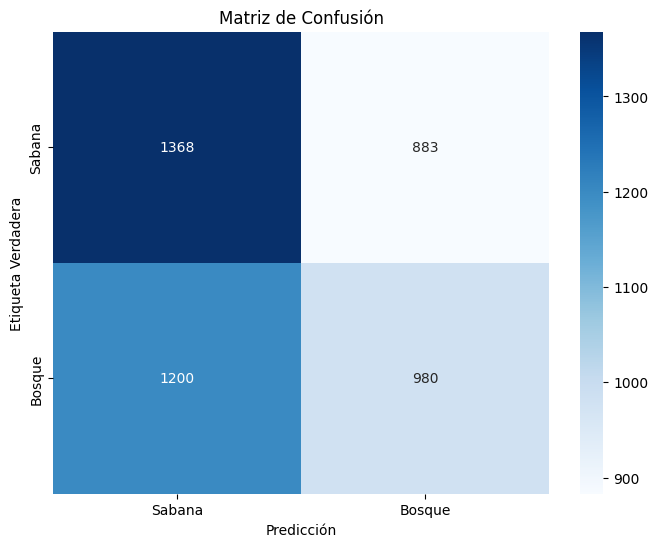

In [54]:
conf_matrix = confusion_matrix(y_val, y_pred)
class_labels = ['Sabana', 'Bosque']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

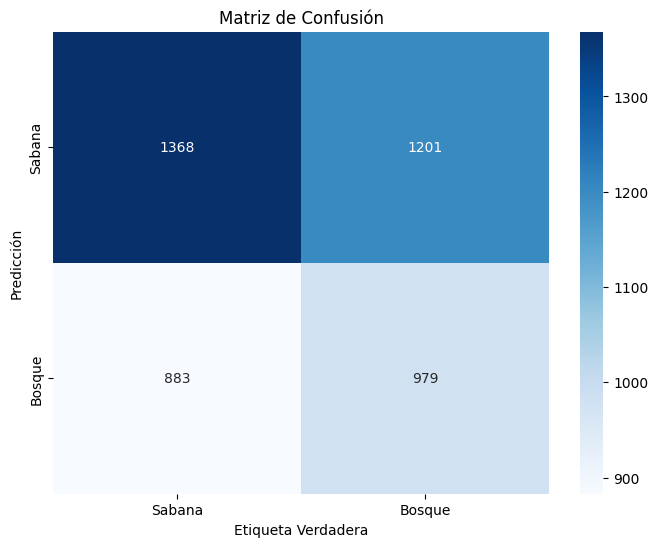

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
class_labels = ['Sabana', 'Bosque']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Etiqueta Verdadera')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

## Realizando prueba sin imputación de datos

In [55]:
selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_ai_selected = X_ai[selected_indices]
y_ai_selected = y_ai[selected_indices]

In [56]:
n_samples = X_ai_selected.shape[0]
indices = np.arange(n_samples)

X_ai_train, X_ai_test, y_train, y_test, idx_train, idx_test = train_test_split(X_ai_selected, y_ai_selected, indices, test_size=0.2)
X_ai_val, X_ai_test, y_val, y_test, idx_val, idx_test = train_test_split(X_ai_test, y_test, idx_test, test_size=0.5)

In [58]:
total_samples = len(X_train) + len(X_val) + len(X_test)
print("Total de datos seleccionados:", total_samples)

Total de datos seleccionados: 29540


In [61]:
model = LogisticRegression()
model.fit(X_ai_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values